In [520]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [521]:
df = pd.read_csv(r'C:\python\bobolfile\U.S._Chronic_Disease_Indicators_20250329.csv')

In [522]:
df.head(2)

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,TopicID,QuestionID,ResponseID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2019,2019,AR,Arkansas,BRFSS,Diabetes,Diabetes among adults,NaN,%,Crude Prevalence,...,DIA,DIA01,NaN,CRDPREV,SEX,SEXM,NaN,NaN,NaN,NaN
1,2019,2019,ID,Idaho,BRFSS,Diabetes,Diabetes among adults,NaN,%,Crude Prevalence,...,DIA,DIA01,NaN,CRDPREV,SEX,SEXM,NaN,NaN,NaN,NaN


In [523]:
cancer = df[df["Topic"] == "Cancer"]
cancer.head(2)

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,TopicID,QuestionID,ResponseID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
112,2015,2019,OH,Ohio,US Cancer DVT,Cancer,"Invasive cancer (all sites combined), incidence",NaN,Number,Number,...,CAN,CAN07,NaN,NMBR,SEX,SEXF,NaN,NaN,NaN,NaN
113,2015,2019,ID,Idaho,US Cancer DVT,Cancer,Invasive cancer (all sites combined) mortality...,NaN,"per 100,000",Age-adjusted Rate,...,CAN,CAN08,NaN,AGEADJRATE,RACE,AIAN,NaN,NaN,NaN,NaN


In [524]:
cancer.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'Response', 'DataValueUnit', 'DataValueType',
       'DataValue', 'DataValueAlt', 'DataValueFootnoteSymbol',
       'DataValueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'StratificationCategory3', 'Stratification3',
       'Geolocation', 'LocationID', 'TopicID', 'QuestionID', 'ResponseID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')

In [525]:
cancer.dtypes

YearStart                      int64
YearEnd                        int64
LocationAbbr                  object
LocationDesc                  object
DataSource                    object
Topic                         object
Question                      object
Response                     float64
DataValueUnit                 object
DataValueType                 object
DataValue                    float64
DataValueAlt                 float64
DataValueFootnoteSymbol       object
DataValueFootnote             object
LowConfidenceLimit           float64
HighConfidenceLimit          float64
StratificationCategory1       object
Stratification1               object
StratificationCategory2      float64
Stratification2              float64
StratificationCategory3      float64
Stratification3              float64
Geolocation                   object
LocationID                     int64
TopicID                       object
QuestionID                    object
ResponseID                   float64
D

In [526]:
cancer.describe(include="all")

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,TopicID,QuestionID,ResponseID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
count,22358.000000,22358.000000,22358,22358,22358,22358,22358,0.0,22358,22358,...,22358,22358,0.0,22358,22358,22358,0.0,0.0,0.0,0.0
unique,NaN,NaN,55,55,2,1,10,NaN,3,5,...,1,10,NaN,5,3,11,NaN,NaN,NaN,NaN
top,NaN,NaN,OH,Ohio,US Cancer DVT,Cancer,"Invasive cancer (all sites combined), incidence",NaN,"per 100,000",Number,...,CAN,CAN07,NaN,NMBR,RACE,AIAN,NaN,NaN,NaN,NaN
freq,NaN,NaN,424,424,17520,22358,2544,NaN,11680,5840,...,22358,2544,NaN,5840,14800,2740,NaN,NaN,NaN,NaN
mean,2016.650863,2019.785312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.280745,0.836649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2015.000000,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2015.000000,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2016.000000,2020.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2016.000000,2020.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [527]:
cancer.head(2)

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,TopicID,QuestionID,ResponseID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
112,2015,2019,OH,Ohio,US Cancer DVT,Cancer,"Invasive cancer (all sites combined), incidence",NaN,Number,Number,...,CAN,CAN07,NaN,NMBR,SEX,SEXF,NaN,NaN,NaN,NaN
113,2015,2019,ID,Idaho,US Cancer DVT,Cancer,Invasive cancer (all sites combined) mortality...,NaN,"per 100,000",Age-adjusted Rate,...,CAN,CAN08,NaN,AGEADJRATE,RACE,AIAN,NaN,NaN,NaN,NaN


In [528]:
uniqe_questions = pd.unique(cancer["Question"])
uniqe_questions

array(['Invasive cancer (all sites combined), incidence',
       'Invasive cancer (all sites combined) mortality among all people, underlying cause',
       'Colon and rectum (colorectal) cancer mortality among all people, underlying cause',
       'Cervical cancer mortality among all females, underlying cause',
       'Breast cancer mortality among all females, underlying cause',
       'Prostate cancer mortality among all males, underlying cause',
       'Lung and bronchial cancer mortality among all people, underlying cause',
       'Colorectal cancer screening among adults aged 45-75 years',
       'Cervical cancer screening among women aged 21-65 years',
       'Mammography use among women aged 50-74 years'], dtype=object)

In [529]:
print(len(uniqe_questions))

10


In [530]:
cancer.shape

(22358, 34)

In [531]:
df.shape

(309215, 34)

In [532]:
a = "PINK"
print(a.lower())

pink


In [533]:
mortality_questions = []

for questions in  uniqe_questions:
    if "mortality" in questions.lower():
        mortality_questions.append(questions)    
mortality_questions

['Invasive cancer (all sites combined) mortality among all people, underlying cause',
 'Colon and rectum (colorectal) cancer mortality among all people, underlying cause',
 'Cervical cancer mortality among all females, underlying cause',
 'Breast cancer mortality among all females, underlying cause',
 'Prostate cancer mortality among all males, underlying cause',
 'Lung and bronchial cancer mortality among all people, underlying cause']

In [534]:
cancer = cancer.drop(columns = 'Topic')

In [535]:
underlying_cause_questions = []

for question in uniqe_questions:
    if 'underlying cause' in question.lower():
        underlying_cause_questions.append(question)
        
underlying_cause_questions

['Invasive cancer (all sites combined) mortality among all people, underlying cause',
 'Colon and rectum (colorectal) cancer mortality among all people, underlying cause',
 'Cervical cancer mortality among all females, underlying cause',
 'Breast cancer mortality among all females, underlying cause',
 'Prostate cancer mortality among all males, underlying cause',
 'Lung and bronchial cancer mortality among all people, underlying cause']

In [536]:
underlying_cause = cancer[cancer['Question'].isin(underlying_cause_questions)]

<Axes: xlabel='Question', ylabel='Count'>

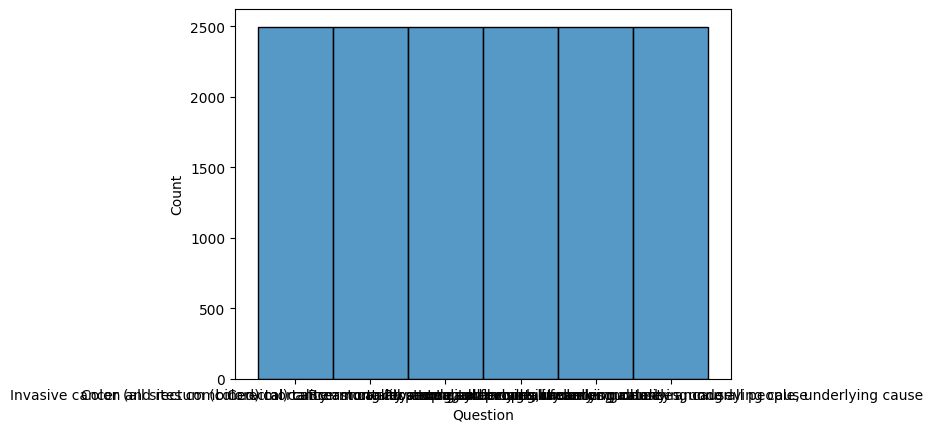

In [537]:
sns.histplot(data = underlying_cause, x = 'Question')

In [538]:
underlying_cause.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Question', 'Response', 'DataValueUnit', 'DataValueType', 'DataValue',
       'DataValueAlt', 'DataValueFootnoteSymbol', 'DataValueFootnote',
       'LowConfidenceLimit', 'HighConfidenceLimit', 'StratificationCategory1',
       'Stratification1', 'StratificationCategory2', 'Stratification2',
       'StratificationCategory3', 'Stratification3', 'Geolocation',
       'LocationID', 'TopicID', 'QuestionID', 'ResponseID', 'DataValueTypeID',
       'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')

In [539]:
underlying_cause['Question'].value_counts(sort=True)

Question
Invasive cancer (all sites combined) mortality among all people, underlying cause    2496
Colon and rectum (colorectal) cancer mortality among all people, underlying cause    2496
Cervical cancer mortality among all females, underlying cause                        2496
Breast cancer mortality among all females, underlying cause                          2496
Prostate cancer mortality among all males, underlying cause                          2496
Lung and bronchial cancer mortality among all people, underlying cause               2496
Name: count, dtype: int64

In [540]:
cancer['Question'].value_counts(sort=True)

Question
Invasive cancer (all sites combined), incidence                                      2544
Invasive cancer (all sites combined) mortality among all people, underlying cause    2496
Colon and rectum (colorectal) cancer mortality among all people, underlying cause    2496
Cervical cancer mortality among all females, underlying cause                        2496
Breast cancer mortality among all females, underlying cause                          2496
Prostate cancer mortality among all males, underlying cause                          2496
Lung and bronchial cancer mortality among all people, underlying cause               2496
Colorectal cancer screening among adults aged 45-75 years                            2200
Mammography use among women aged 50-74 years                                         1758
Cervical cancer screening among women aged 21-65 years                                880
Name: count, dtype: int64

In [541]:
cancer.to_csv("cancer.csv", index=False)

In [542]:
cancer.isna().sum()

YearStart                        0
YearEnd                          0
LocationAbbr                     0
LocationDesc                     0
DataSource                       0
Question                         0
Response                     22358
DataValueUnit                    0
DataValueType                    0
DataValue                     5859
DataValueAlt                  5859
DataValueFootnoteSymbol      16499
DataValueFootnote            16499
LowConfidenceLimit           10503
HighConfidenceLimit          10503
StratificationCategory1          0
Stratification1                  0
StratificationCategory2      22358
Stratification2              22358
StratificationCategory3      22358
Stratification3              22358
Geolocation                    422
LocationID                       0
TopicID                          0
QuestionID                       0
ResponseID                   22358
DataValueTypeID                  0
StratificationCategoryID1        0
StratificationID1   

In [543]:
cancer.head(2)

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Question,Response,DataValueUnit,DataValueType,DataValue,...,TopicID,QuestionID,ResponseID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
112,2015,2019,OH,Ohio,US Cancer DVT,"Invasive cancer (all sites combined), incidence",NaN,Number,Number,34395.0,...,CAN,CAN07,NaN,NMBR,SEX,SEXF,NaN,NaN,NaN,NaN
113,2015,2019,ID,Idaho,US Cancer DVT,Invasive cancer (all sites combined) mortality...,NaN,"per 100,000",Age-adjusted Rate,123.1,...,CAN,CAN08,NaN,AGEADJRATE,RACE,AIAN,NaN,NaN,NaN,NaN


In [544]:
data = []
for col in cancer.columns:
    if cancer[col].isna().sum() > 0:
        print(f"Column '{col}' has {cancer[col].isna().sum()} missing values.")
        data.append(cancer[col].fillna(0))
    else:
        data.append(cancer[col])
        
data = pd.DataFrame(data)



data.head()

Column 'Response' has 22358 missing values.
Column 'DataValue' has 5859 missing values.
Column 'DataValueAlt' has 5859 missing values.
Column 'DataValueFootnoteSymbol' has 16499 missing values.
Column 'DataValueFootnote' has 16499 missing values.
Column 'LowConfidenceLimit' has 10503 missing values.
Column 'HighConfidenceLimit' has 10503 missing values.
Column 'StratificationCategory2' has 22358 missing values.
Column 'Stratification2' has 22358 missing values.
Column 'StratificationCategory3' has 22358 missing values.
Column 'Stratification3' has 22358 missing values.
Column 'Geolocation' has 422 missing values.
Column 'ResponseID' has 22358 missing values.
Column 'StratificationCategoryID2' has 22358 missing values.
Column 'StratificationID2' has 22358 missing values.
Column 'StratificationCategoryID3' has 22358 missing values.
Column 'StratificationID3' has 22358 missing values.


,112,113,114,115,116,117,118,119,120,121,...,308879,308918,309117,309120,309122,309138,309156,309160,309170,309179
YearStart,2015,2015,2015,2015,2016,2015,2015,2016,2015,2015,...,2022,2022,2022,2022,2022,2022,2022,2022,2022,2022
YearEnd,2019,2019,2019,2019,2020,2019,2019,2020,2019,2019,...,2022,2022,2022,2022,2022,2022,2022,2022,2022,2022
LocationAbbr,OH,ID,WY,AR,NJ,CO,AL,ID,NY,ND,...,WA,WY,VA,WA,WY,WY,WV,WA,VI,WI
LocationDesc,Ohio,Idaho,Wyoming,Arkansas,New Jersey,Colorado,Alabama,Idaho,New York,North Dakota,...,Washington,Wyoming,Virginia,Washington,Wyoming,Wyoming,West Virginia,Washington,Virgin Islands,Wisconsin
DataSource,US Cancer DVT,US Cancer DVT,US Cancer DVT,US Cancer DVT,US Cancer DVT,US Cancer DVT,US Cancer DVT,US Cancer DVT,US Cancer DVT,US Cancer DVT,...,BRFSS,BRFSS,BRFSS,BRFSS,BRFSS,BRFSS,BRFSS,BRFSS,BRFSS,BRFSS


In [545]:
cancer.isna().sum()

YearStart                        0
YearEnd                          0
LocationAbbr                     0
LocationDesc                     0
DataSource                       0
Question                         0
Response                     22358
DataValueUnit                    0
DataValueType                    0
DataValue                     5859
DataValueAlt                  5859
DataValueFootnoteSymbol      16499
DataValueFootnote            16499
LowConfidenceLimit           10503
HighConfidenceLimit          10503
StratificationCategory1          0
Stratification1                  0
StratificationCategory2      22358
Stratification2              22358
StratificationCategory3      22358
Stratification3              22358
Geolocation                    422
LocationID                       0
TopicID                          0
QuestionID                       0
ResponseID                   22358
DataValueTypeID                  0
StratificationCategoryID1        0
StratificationID1   

In [546]:
cancer.describe(include="all")

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Question,Response,DataValueUnit,DataValueType,DataValue,...,TopicID,QuestionID,ResponseID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
count,22358.000000,22358.000000,22358,22358,22358,22358,0.0,22358,22358,16499.000000,...,22358,22358,0.0,22358,22358,22358,0.0,0.0,0.0,0.0
unique,NaN,NaN,55,55,2,10,NaN,3,5,NaN,...,1,10,NaN,5,3,11,NaN,NaN,NaN,NaN
top,NaN,NaN,OH,Ohio,US Cancer DVT,"Invasive cancer (all sites combined), incidence",NaN,"per 100,000",Number,NaN,...,CAN,CAN07,NaN,NMBR,RACE,AIAN,NaN,NaN,NaN,NaN
freq,NaN,NaN,424,424,17520,2544,NaN,11680,5840,NaN,...,22358,2544,NaN,5840,14800,2740,NaN,NaN,NaN,NaN
mean,2016.650863,2019.785312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1858.512419,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.280745,0.836649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22837.865220,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2015.000000,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.700000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2015.000000,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.750000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2016.000000,2020.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2016.000000,2020.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,217.900000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [547]:
pd.to_datetime(cancer['YearStart'], errors='coerce')
pd.to_datetime(cancer['YearEnd'], errors='coerce')

112      1970-01-01 00:00:00.000002019
113      1970-01-01 00:00:00.000002019
114      1970-01-01 00:00:00.000002019
115      1970-01-01 00:00:00.000002019
116      1970-01-01 00:00:00.000002020
                      ...             
309138   1970-01-01 00:00:00.000002022
309156   1970-01-01 00:00:00.000002022
309160   1970-01-01 00:00:00.000002022
309170   1970-01-01 00:00:00.000002022
309179   1970-01-01 00:00:00.000002022
Name: YearEnd, Length: 22358, dtype: datetime64[ns]

In [548]:
numeric = cancer.select_dtypes('number')

In [549]:

filtering_stratification = []
for col in numeric.columns:
    if 'stratification' in col.lower():
        filtering_stratification.append(col)
filtering_stratification

['StratificationCategory2',
 'Stratification2',
 'StratificationCategory3',
 'Stratification3',
 'StratificationCategoryID2',
 'StratificationID2',
 'StratificationCategoryID3',
 'StratificationID3']

<Axes: >

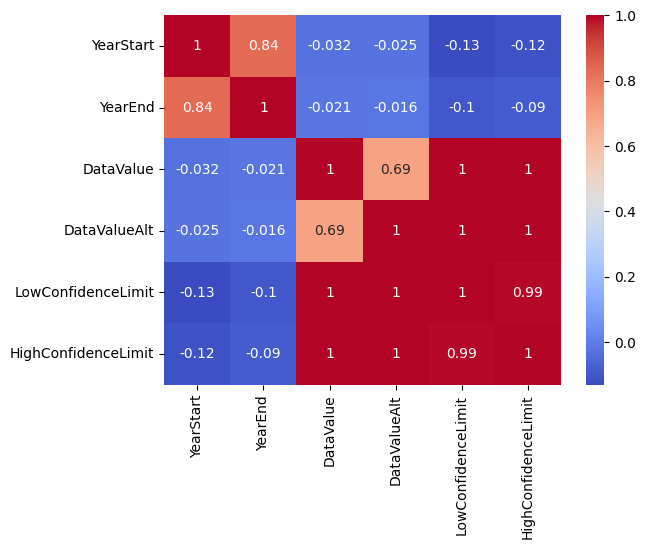

In [550]:
numeric = numeric.drop(columns= filtering_stratification)
numeric = numeric.drop(columns= ['Response', 'ResponseID', 'LocationID'])
sns.heatmap(numeric.corr(), annot=True, cmap='coolwarm')

In [551]:
numeric.head(2)

,YearStart,YearEnd,DataValue,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit
112,2015,2019,34395.0,34395.0,NaN,NaN
113,2015,2019,123.1,123.1,100.5,149.1


In [552]:
numeric.isna().sum()

YearStart                  0
YearEnd                    0
DataValue               5859
DataValueAlt            5859
LowConfidenceLimit     10503
HighConfidenceLimit    10503
dtype: int64

In [553]:
numeric.dropna(inplace=True)
numeric.head(2)

,YearStart,YearEnd,DataValue,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit
113,2015,2019,123.1,123.1,100.5,149.1
114,2015,2019,12.2,12.2,11.0,13.5


In [554]:
numeric.shape

(11855, 6)

<Axes: >

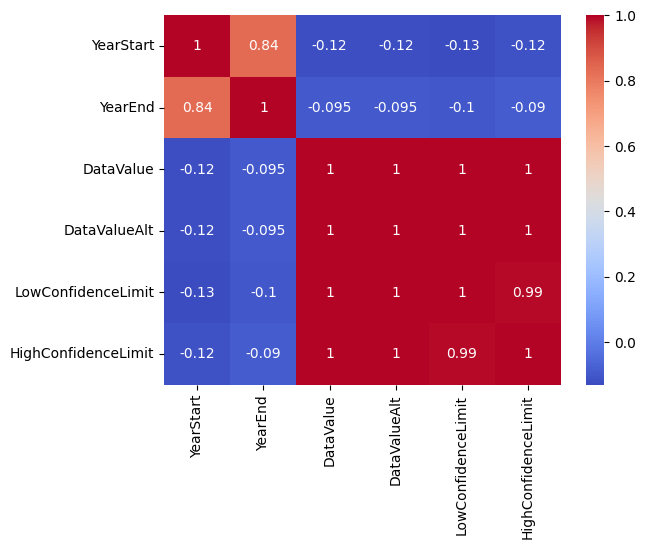

In [555]:
sns.heatmap(numeric.corr(), annot=True, cmap='coolwarm')

In [556]:
numeric.describe()

,YearStart,YearEnd,DataValue,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit
count,11855.000000,11855.000000,11855.000000,11855.000000,11855.000000,11855.000000
mean,2016.651033,2019.784901,100.082109,100.082109,95.438094,104.919772
std,2.282210,0.837451,144.343883,144.343883,142.222331,147.013233
min,2015.000000,2019.000000,0.700000,0.700000,0.400000,1.100000
25%,2015.000000,2019.000000,17.200000,17.200000,15.600000,18.800000
50%,2016.000000,2020.000000,46.000000,46.000000,40.400000,51.900000
75%,2016.000000,2020.000000,86.900000,86.900000,81.800000,92.800000
max,2022.000000,2022.000000,1089.400000,1089.400000,940.000000,1255.800000


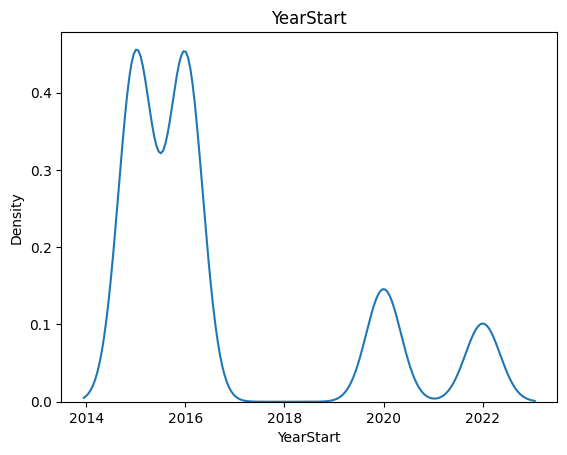

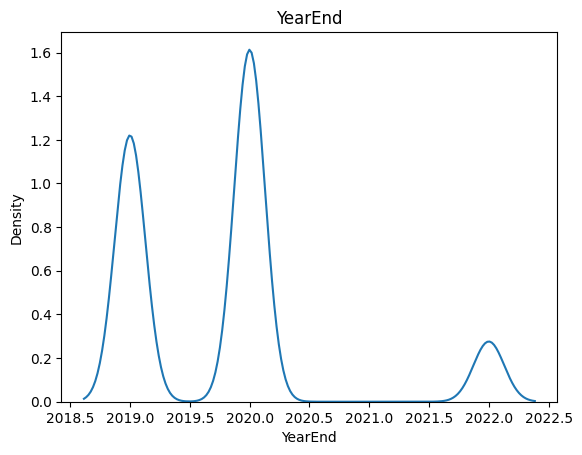

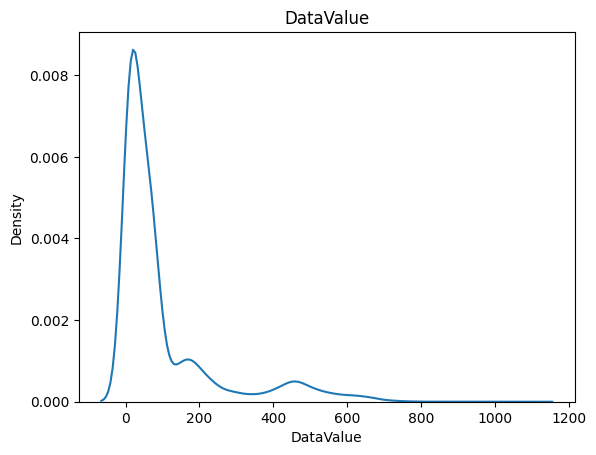

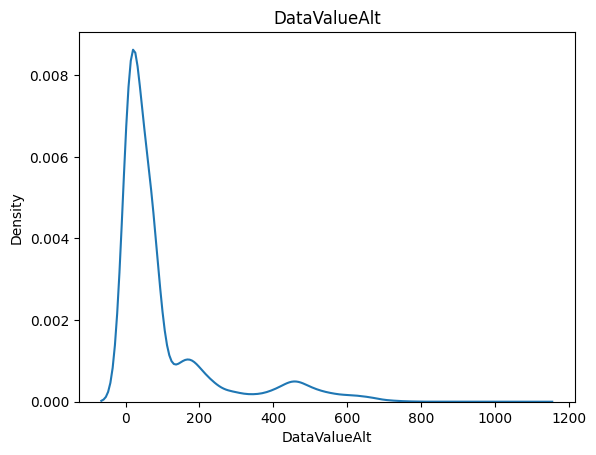

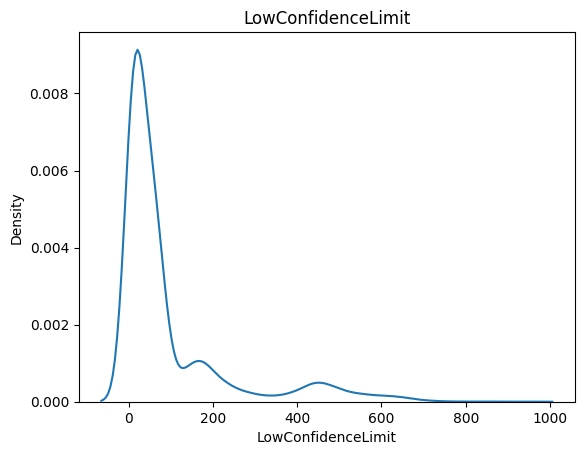

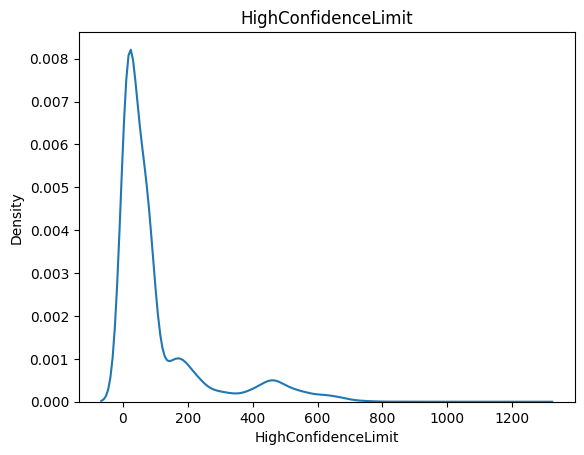

In [557]:
for i in numeric.columns:
    sns.kdeplot(data=numeric, x=i)
    plt.title(str(i))
    plt.show()

In [558]:
non_numeric = cancer.select_dtypes(exclude='number')
non_numeric.columns

Index(['LocationAbbr', 'LocationDesc', 'DataSource', 'Question',
       'DataValueUnit', 'DataValueType', 'DataValueFootnoteSymbol',
       'DataValueFootnote', 'StratificationCategory1', 'Stratification1',
       'Geolocation', 'TopicID', 'QuestionID', 'DataValueTypeID',
       'StratificationCategoryID1', 'StratificationID1'],
      dtype='object')

In [559]:
missingcats = []

for col in non_numeric.columns:
    if non_numeric[col].isna().sum() > 0:
        print(f"Column '{col}' has {non_numeric[col].isna().sum()} missing values.")
        missingcats.append(col)
        
missingcats

Column 'DataValueFootnoteSymbol' has 16499 missing values.
Column 'DataValueFootnote' has 16499 missing values.
Column 'Geolocation' has 422 missing values.


['DataValueFootnoteSymbol', 'DataValueFootnote', 'Geolocation']

In [560]:
non_numeric.drop(columns=missingcats, inplace=True)


In [561]:
filtering_id = []
for col in non_numeric.columns:
    if 'id' in col.lower():
        filtering_id.append(col)
non_numeric = non_numeric.drop(columns=filtering_id)

In [562]:
non_numeric = non_numeric.drop(columns = ['LocationAbbr'])

In [563]:
non_numeric.shape

(22358, 7)

In [564]:
for col in non_numeric.columns:
    print(str(col))
    print(len(pd.unique(non_numeric[col])))
    


LocationDesc
55
DataSource
2
Question
10
DataValueUnit
3
DataValueType
5
StratificationCategory1
3
Stratification1
11


In [565]:
top_locations = non_numeric['LocationDesc'].value_counts(sort=True, normalize=True).head(10)
top_locations

LocationDesc
Ohio            0.018964
Idaho           0.018964
Wyoming         0.018964
Arkansas        0.018964
New Jersey      0.018964
Colorado        0.018964
Alabama         0.018964
New York        0.018964
North Dakota    0.018964
Texas           0.018964
Name: proportion, dtype: float64

In [566]:
datasource = non_numeric['DataSource'].value_counts(sort=True).head(10)
datasource

DataSource
US Cancer DVT    17520
BRFSS             4838
Name: count, dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_22212\2322469785.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:orange'` for the same effect.

  sns.barplot(data = cancer, x = 'DataSource', y = 'DataValue', color='orange', hue = 'StratificationCategory1')


<Axes: xlabel='DataSource', ylabel='DataValue'>

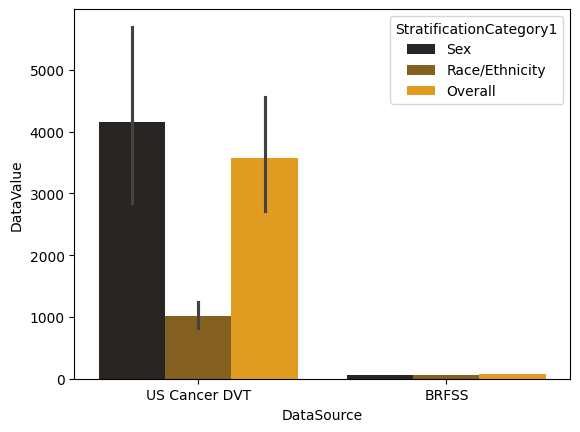

In [573]:
sns.barplot(data = cancer, x = 'DataSource', y = 'DataValue', color='orange', hue = 'StratificationCategory1')

In [570]:
print(pd.unique(cancer['Stratification1']))

['Female' 'American Indian or Alaska Native, non-Hispanic'
 'White, non-Hispanic' 'Male' 'Asian or Pacific Islander, non-Hispanic'
 'Black, non-Hispanic' 'Overall' 'Hispanic' 'Multiracial, non-Hispanic'
 'Asian, non-Hispanic' 'Hawaiian or Pacific Islander, non-Hispanic']


C:\Users\User\AppData\Local\Temp\ipykernel_22212\245267357.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 30)` for the same effect.

  g = sns.catplot(data = cancer, x = 'Stratification1', y = 'DataValue', kind='bar', aspect= 16/10, ci = 30)


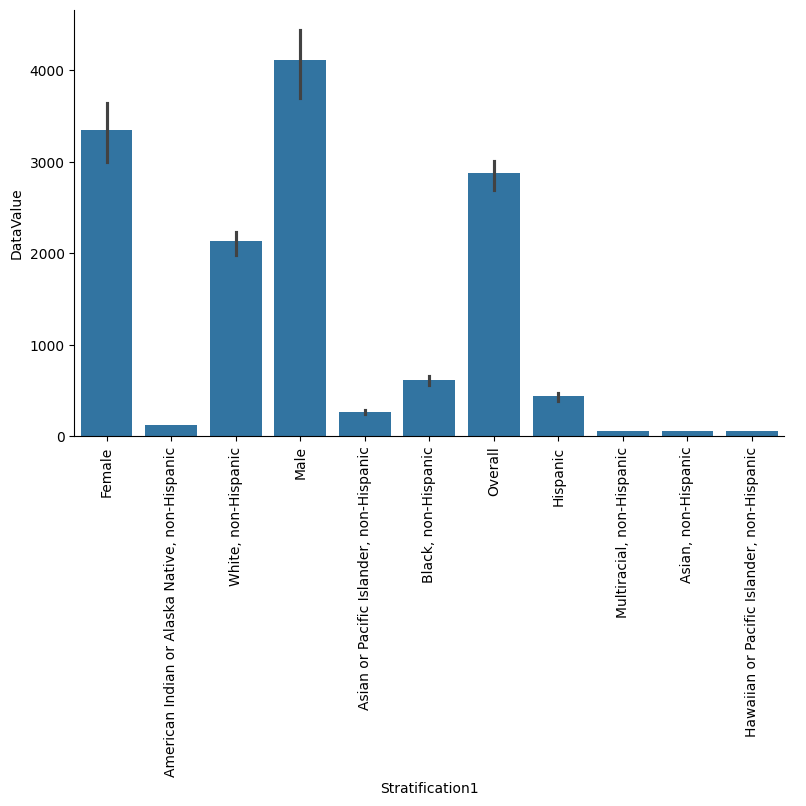

In [590]:
g = sns.catplot(data = cancer, x = 'Stratification1', y = 'DataValue', kind='bar', aspect= 16/10, ci = 30)
g.set_xticklabels(rotation=90)